

# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

### 1.1 Dataset Description  

The dataset being analysed/investigated collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

###### Below is a list of column names (and explanations) for our dataset:

*I consider ALL columns headings (except for the **PatientID** and **AppointmentID**) below to be important for our analysis as they can be linked to the "No-show" indicated in the last column.*

- **PatientId** - it a unique identification number for each patient.
- **AppointmentID** - it a unique identification number for each appointment.
- **Gender** - indicates the gender of the patient. 
- **ScheduledDay** - tells us on what day the patient set up their appointment. 
- **Age** - indicates the age of the patient. 
- **Neighborhood** - indicates the location of the hospital. 
- **Scholarship** - indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
- **Hipertension** - indicates whether or not the patient has hypertension. 
- **Diabetes** - indicates whether or not the patient is diabetic. 
- **Alcoholism** - indicates whether or not the patient consumes alcohol.
- **Handcap** - indicates whether or not the patient is a handicap.
- **SMS_received** - indicates whether or not the sms was received by the patient. 
- **No-show** - indicates whether or not the patient showed up for the appointment. 


### 1.2 Question(s) for Analysis

#### Questions:
1. **Question 1** - Which age group(s) have high number of patients?
2. **Question 2** - Can gender be used to predict whether or not the patient will show up for their appointment?
3. **Question 3** - Can alcoholism be linked to missing scheduled appointments?
4. **Question 4** - Are patients who receives an SMS reminder less likely to miss their scheduled appointments?

### 1.3 Importing packages, reading dataset, and exploring dataset

In [208]:
import pandas as pd                   # to read & explore data
import numpy as np                    # to read & explore data
import seaborn as sns                 # to create visualizations from data
import matplotlib.pyplot as plt     # to create visualizations from data
from datetime import datetime, date
sns.set_style=('darkgrid') 
% matplotlib inline               

<a id='wrangling'></a>
## 2. Data Wrangling

- In this section, i will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 


### 2.1 General Properties


In [209]:
# Load the dataset (csv file) to the dataframe (df)

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')   

# confirm that the dataset has been loaded correctly by viewing the first 5 rows of our dataframe
df.head()  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [210]:
# check the dimensions of our dataframe
df.shape

(110527, 14)

>Our dataset has 110527 rows and 14 columns

In [211]:
# check the data types to see if there are some data types whic requires fixing before the analysis
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

>**ScheduledDay** and **AppointmentDay** object (string) will need to be coverted to DateTime

In [212]:
# Shows a discriptive statistical information about our dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>**We can see that:**
- Minimum age is -1, which is less than a year
- Mean age is 37
- Maximum age is 115

In [213]:
# dataframe info to check if there is 'null' values in our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>From the above info table, we can see that we do not have any missing data.

In [214]:
# to check if we have duplicate rows in our dataset
sum(df.duplicated())

0

>There is no duplicated rows in our dataset

In [215]:
# checking the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

From the above:
>- Total unique values for **PatientId** is less than the total sample which means that some patients booked their appointments more than once.
>- Total unique values for **AppointmentDay** is 27 days.
>- Total uniques ages is 104.
>- Total unique neighbourhoods is 81


### 2.2 Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

#### Arising from the data exploration i have done in the previous section, i will now proceed to clean the data as follows:


- Remove unnecessary columns and rows
- Clean columns headings (Correct spelling errors, and replace empty spaces with an underscore on columns headings)
- Convert data type for **ScheduledDay** and **AppointmentDay** from **object** to **DateTime**
- Lowercase all headings of columns
- Fix data types format issues
- Add a new column for "waiting period", which is the number of days from the day that the appointment was made until the day of the appointment.


#### 2.2.1 Remove unnecessary columns

In [216]:
# we will remove PatientId, and AppointmentID columns as we will not be useful in our analysis
df_clean = df.drop(['AppointmentID', 'PatientId'], axis=1)

#verify changes
df_clean.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2.2.2 Remove unnecessary rows

In [217]:
# Removing rows that have ages of zero or less as these are incorrect

age_neg = df_clean.query('Age < 0')

df_clean.drop(age_neg.index, inplace=True)
df_clean.shape    #number of rows have now decreased by 1.

(110526, 12)

#### 2.2.3 Clean columns headings 

In [218]:
# cleaning columns data - correcting spelling mistakes and replacing dash(-) with underscore(_)

df_clean.rename(columns = {'ScheduledDay': 'Scheduled_Day', 'AppointmentDay': 'Appointment_Day', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace=True)
print(df_clean.columns)

Index(['Gender', 'Scheduled_Day', 'Appointment_Day', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show'],
      dtype='object')


In [219]:
# cleaning columns data - making all headings lowercase, and splitting & adding underscore (-) before 'day'

df_clean.rename(columns=lambda x:x.strip().lower(), inplace=True)

#confirm changes
df_clean.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2.2.4 Fix data types format issues

In [220]:
# converting 'scheduled_day' and appointment_day' columns to DateTime, and only keep the date only (without the time)

columns = ['scheduled_day', 'appointment_day']
for column in columns:
    df_clean[column] = pd.to_datetime(pd.to_datetime(df_clean[column]).dt.date)

# verify changes
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns]
appointment_day    110526 non-null datetime64[ns]
age                110526 non-null int64
neighbourhood      110526 non-null object
scholarship        110526 non-null int64
hypertension       110526 non-null int64
diabetes           110526 non-null int64
alcoholism         110526 non-null int64
handicap           110526 non-null int64
sms_received       110526 non-null int64
no_show            110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


In [221]:
#verify that the time is nolonger included with the date
df_clean.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No




#### 2.4.5 Create a new column "waiting_period", to replace "scheduled_day" and "appointment_day"
>- The new column will indicate the number of days counting from the scheduled_day until appointment_day
>- The new column will help us to see if there are any number of days (between scheduling and appointment) which are negative, so that we can therefore eliminate those affected rows.

In [222]:
# days between
waiting_period = (df_clean['appointment_day'] - df_clean['scheduled_day']).dt.days

# new column
df_clean.insert(3, 'waiting_period', waiting_period)

#verify changes
df_clean.head()

,gender,scheduled_day,appointment_day,waiting_period,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [223]:
# View rows with negative values for "waiting_period"

neg_waiting_period = df_clean.query('waiting_period < 0')
neg_waiting_period

# 5 rows were found with negative waiting period

,gender,scheduled_day,appointment_day,waiting_period,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
27033,M,2016-05-10,2016-05-09,-1,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18,2016-05-17,-1,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05,2016-05-04,-1,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11,2016-05-05,-6,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04,2016-05-03,-1,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [224]:
# Remove rows with negative values for "waiting_period", as it in an invalid values
df_clean.drop(neg_waiting_period.index, inplace=True)

#Verify changes
neg_waiting_period

,gender,scheduled_day,appointment_day,waiting_period,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
27033,M,2016-05-10,2016-05-09,-1,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18,2016-05-17,-1,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05,2016-05-04,-1,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11,2016-05-05,-6,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04,2016-05-03,-1,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [225]:
#checking the number of rows left after removing 5 rows:
df_clean.shape

#110521 rows left!

(110521, 13)

In [226]:
# We now need to remove columns for "scheduled_day" and "appointment_day" as they will nolonger be useful.
# they have both been replaced by the new column "waiting_period"

df_clean.drop(['scheduled_day', 'appointment_day'], axis=1, inplace=True)

#verify changes
df_clean.head()

,gender,waiting_period,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [227]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
gender            110521 non-null object
waiting_period    110521 non-null int64
age               110521 non-null int64
neighbourhood     110521 non-null object
scholarship       110521 non-null int64
hypertension      110521 non-null int64
diabetes          110521 non-null int64
alcoholism        110521 non-null int64
handicap          110521 non-null int64
sms_received      110521 non-null int64
no_show           110521 non-null object
dtypes: int64(8), object(3)
memory usage: 10.1+ MB


#### 2.2.5 Removing the time on the column for "scheduled_day" and "appointment_day" as it will not be useful to us.
> Time on the "appointment_day" was not captured as it only reflects zeros.


In [228]:
# For visualizations, we will use the following "mask"
showed_up = df_clean.no_show == False
did_not_show_up = df_clean.no_show == True

In [229]:
df_clean.head()

,gender,waiting_period,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## 3. Exploratory Data Analysis


I will start by defining a function that i will use throughout my analysis in order to group the "no_show" counts which have been grouped by various features based on our dataset. It will help us to plot that required graphs and also to  get the various proportings by percentage. 

In [230]:
# Define a function to be used

def get_counts (feature_name):
    counts = df_clean.groupby([feature_name, 'no_show']).count().iloc[:,0]    # will group the no_show counts using feature_name
    total = df_clean.groupby([feature_name]).count().iloc[:,0]                # will get the total counts
    counts = counts/total                                                     # will calculate the percentage proportion
    return counts                                                             # will return the counts
 


### Question 1 - Which age group(s) have high number of patients?

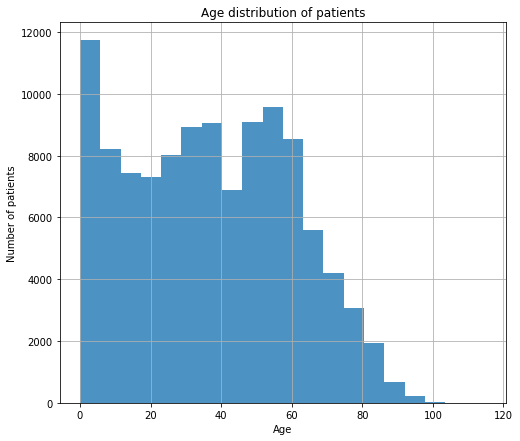

In [231]:
# I will plot the histogram graph in order to show the age distribution of patients on our dataset.
df_clean.age.hist(figsize=(8,7), bins=20, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Age distribution of patients')
plt.legend();

**Answer:**
> From the distribution above, it can be seen that the high number of patients comes from patients of ages 0-5, 25-40, and 45-65.

### Question 2 - Can gender be used to predict whether or not the patient will show up for their appointment?

#### To answer the question, i will:
1. Plot a pie chart to show the distribution of appointments based on gender.
2. Use the count function to plot a bar graph which will show the proportion of Females VS Males with regard to showing up for their appointments.
 

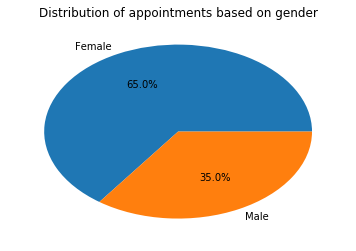

In [232]:
# Define a gender_count variable which will help us to count the appointments made and sort them by gender.
# I will plot a pie chart to show the distribution of appointments based on gender.

gender_counts = df_clean['gender'].value_counts()
plt.Figure(figsize=(10, 10))
plt.pie(gender_counts.values, labels=['Female', 'Male'], autopct='%1.1f%%')
plt.title('Distribution of appointments based on gender')
plt.show()

gender  no_show
F       No         0.796885
        Yes        0.203115
M       No         0.800362
        Yes        0.199638
Name: waiting_period, dtype: float64


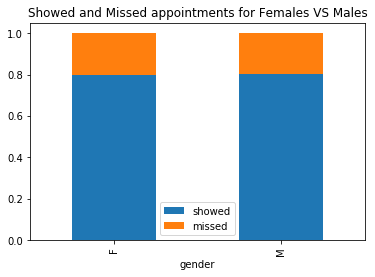

In [233]:
# use the count function to plot a bar graph
counts = get_counts('gender')
counts.unstack().plot(kind='bar', stacked=True)
plt.legend(["showed", "missed"]);
plt.title("Showed and Missed appointments for Females VS Males")
print(counts)

**Answer:** 
- On the pie chart, we did note there is significantly more Females (65%) who scheduled their appoitments compared to Males (35%). 
- On the bar graph, there is no relationship between gender and missing scheduled appointments as the percentages of Females and Males who missed their appointments is almost the same.

### Question 3 - Can alcoholism be linked to missing scheduled appointments?

0    107161
1      3360
Name: alcoholism, dtype: int64


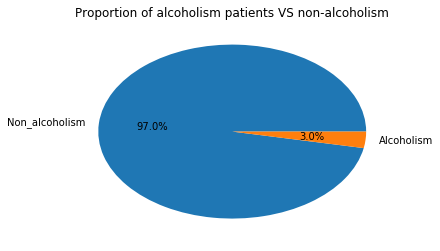

In [234]:
# First i want to plot a pie chart in order to see the proportion of patients who consumes alcohol. 
#This will help me to decide if the sample size is large enough to derive useful insights regarding the relationship 
#between the two variables.
alcohol_counts = df_clean['alcoholism'].value_counts()
plt.Figure(figsize=(10, 10))
plt.pie(alcohol_counts.values, labels=['Non_alcoholism', 'Alcoholism'], autopct='%1.1f%%')
plt.title('Proportion of alcoholism patients VS non-alcoholism')
print(alcohol_counts)
plt.show()

alcoholism  no_show
0           No         0.798089
            Yes        0.201911
1           No         0.798512
            Yes        0.201488
Name: gender, dtype: float64


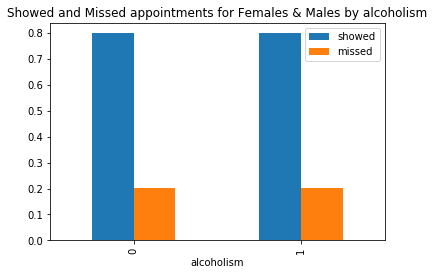

In [235]:
# I will plot a bar graph to show if there is any relationship between alcoholism and missing of appointments.
counts = get_counts('alcoholism')
counts.unstack().plot(kind='bar')
plt.legend(["showed", "missed"]);
plt.title("Showed and Missed appointments for Females & Males by alcoholism")
print(counts)

#### Answer:
>- Only 3% of patients are classified as alcoholism, and therefore this sample is very small to derive useful insight regarding the relationship between alcoholism and missing of appointments.
>- From the bar graph, there is no relationship between alcoholism and missing of appointments.

### Question 4 - Are patients who receives SMS reminder less likely to miss their scheduled appointments?

0    75039
1    35482
Name: sms_received, dtype: int64


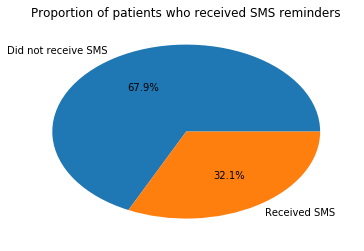

In [236]:
# firstly, i want to plot a pie chart so that i can see the proportion of those patients who have received SMS reminders 
#versus those that did not receive.
SMS_counts = df_clean['sms_received'].value_counts()
plt.Figure(figsize=(10, 10))
plt.pie(SMS_counts, labels=['Did not receive SMS', 'Received SMS'], autopct='%1.1f%%')
plt.title('Proportion of patients who received SMS reminders')
print(SMS_counts)
plt.show()


sms_received  no_show
0             No         0.833020
              Yes        0.166980
1             No         0.724255
              Yes        0.275745
Name: gender, dtype: float64


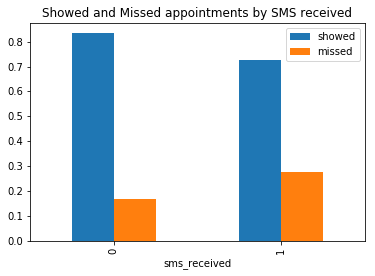

In [237]:
# I want to plot a bar graph to visualize if receiving an SMS reminder prior to the date of an appointment would 
#increase the showing-up of patients for their appointments.
counts = get_counts('sms_received')
counts.unstack().plot(kind='bar')
plt.legend(["showed", "missed"]);
plt.title("Showed and Missed appointments by SMS received")
print(counts)

>**Answer:** 
- The proportion of those that received SMS reminders is 32.1%, and we can accept it even though is a little bit low.
- The bar graph shows that those that received SMS reminders missed appoitments more than those who did not receive SMS reminders. This tells us that SMS reminders does not work at all, and it is even better if there are not sent at all as they have a negative outcome.

<a id='conclusions'></a>
## 4. Conclusions

#### Summary of results
>- Most of the patients are younger people and this we were able to see using a histogram distribution which showed that the highest number of patients were of ages 0-5, 25-40, and 45-65. It does make sense as the older population (more than 65 years) is also few. Our mean age was 37.
>- Female appointments comprised almost 2/3 of the total appoitments.  Male patients only comprised 35% which is quite low. .Our analysis found no correllation between the gender of a patient and the missing of an appointment.Surprisingly, the proportion of patients who miss appointments is almost the same for both genders
>- Alcoholism does not have any effect to predict whether or not the patient will show-up for the appointment. The sample for patient described as alcoholism was only 3% which is very low, and because of that, we cannot really draw meaningful insight using such a small sample.
>- SMS reminders are counter-intuitive as patients who received them represent a higher number of people who missed appointments compared to those who did not receive SMS.

#### Limitations
>- This analysis was based only on descriptive statistics and no inferrential statistical analysis was performed and therefore the results of this analysis cannot be seen as final.
>- The sample data in some instances was very low (e.g. 3% for alcoholism), and this makes it difficult to have meaningful insights from the data.
>- Results of the analysis for SMS reminder were not what we expected. This shows that the analysis that i have done needs to be taken a step forward and use other tools to analyse.
!

In [238]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0